## **Discriminant Analysis**

**Linear Discriminant Analysis (LDA)** is easier to interpret compared to logistic regression, and it does not suffer from unstableness as logistic regression when the classes are well-separated.

Bayes' Theorem states that;\
\begin{equation}
\tag{1}
P(Y=k|X=x)=\frac{P(X=x|Y=k).P(Y=k)}{P(X=x)}
\end{equation}

If we write $\pi_k=P(Y=k)$ as the marginal or prior probability, and $f_k(x)=P(X=x|Y=k)$ as the conditional probability, then we can re-write the above Bayes Theorem as;\
\begin{equation}
\tag{2}
P(Y=k|X=x)=\frac{\pi_k.f_k(x)}{\sum_{l=1}^K \pi_l.f_l(x)}
\end{equation}

Using this, we want to estimate $f_k(x)$, assuming it is normally distributed (or *Gaussian*);\
\begin{equation}
\tag{3}
f_k(x)=\frac{1}{\sqrt{2\pi\sigma_k}}exp(-\frac{1}{2\sigma^2_k}(x-\mu_k)^2)
\end{equation}

If we plug equation 3 into equation 2 and rearrange terms, we can have a function of x in class k as below;\
\begin{equation}
\delta_k(x)=x.\frac{\mu_k}{\sigma^2}-\frac{\mu_k^2}{2\sigma^2}+log(\pi_k)
\end{equation}

In the case of multiple predictors, it is assumed that X values are drawn from the below multivariate normal (or *Gaussian*) distribution.\
\begin{equation}
\tag{4}
f(x) = \frac{1}{(2\pi)^{p/2}|\Sigma|^{1/2}}exp(-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu))
\end{equation}

where $\mu$ is the mean of X (a vector with p components), and $\Sigma = Cov(X)$ is the $p\times p$ covariance matrix of X. So, after plugging the density function into Bayes' theorem and rearranging the terms we have the following **linear function** in x;\
\begin{equation}
\tag{5}
\delta_k(x)=x^T\Sigma^{-1}\mu_k-\frac{1}{2}\mu_k^T\Sigma^{-1}\mu_k+log\pi_k
\end{equation}

We will compute this discriminant function for each of the classes, and pick the largest discriminant function to assign an observation $X=x$ to the class for which it is largest.

In the case of **Quadratic Discriminant Analysis (QDA)**, we will have the following Quadratic discriminant function;\
\begin{equation}
\tag{6}
\delta_k(x)=-\frac{1}{2}log|\Sigma_k|-\frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k)+log\pi_k
\end{equation}

Even though QDA is more flexible compared to LDA, the number of parameters needed to be estimated increases quadratically in QDA while it only increases linearly in LDA. Thus, when larger dimensions are proposed, QDA might have worse performance than LDA.

One of the most prominent examples of using Discriminant Analysis is bankruptcy prediction. I will use the stock market data provided by the book "*An introduction to statistical learning: with applications in R*" (Gareth, J. et al., 2013). This data set comprises daily percentage returns for the S&P 500 stock index for the years 2001-2005. The number of observations are 1250. The R code to retrieve the data is as follows:\
\
<span style='color:Blue'>library ( ISLR2 )</span>\
<span style='color:Blue'>Smarket -> stock_market_data</span>\
<span style='color:Blue'>write.csv(stock_market_data,"C:/Your_Path//file_name.csv", row.names = FALSE)</span>


Now, let's import this data into Python:

In [41]:
import pandas as pd

df = pd.read_csv(r'stock_market_data.csv', index_col=1, parse_dates=True)
print (df)


             Day   Lag1   Lag2   Lag3   Lag4   Lag5   Volume  Today Direction
Year                                                                         
2001-01-01     1  0.381 -0.192 -2.624 -1.055  5.010  1.19130  0.959        Up
2001-01-01     2  0.959  0.381 -0.192 -2.624 -1.055  1.29650  1.032        Up
2001-01-01     3  1.032  0.959  0.381 -0.192 -2.624  1.41120 -0.623      Down
2001-01-01     4 -0.623  1.032  0.959  0.381 -0.192  1.27600  0.614        Up
2001-01-01     5  0.614 -0.623  1.032  0.959  0.381  1.20570  0.213        Up
...          ...    ...    ...    ...    ...    ...      ...    ...       ...
2005-01-01  1246  0.422  0.252 -0.024 -0.584 -0.285  1.88850  0.043        Up
2005-01-01  1247  0.043  0.422  0.252 -0.024 -0.584  1.28581 -0.955      Down
2005-01-01  1248 -0.955  0.043  0.422  0.252 -0.024  1.54047  0.130        Up
2005-01-01  1249  0.130 -0.955  0.043  0.422  0.252  1.42236 -0.298      Down
2005-01-01  1250 -0.298  0.130 -0.955  0.043  0.422  1.38254 -0.

The variables **Lag1** through **Lag5** are percentage returns for each of the five previous trading days while **Today** is the percentage return on the relevant date. **Volume** is the number of shares traded on the previous day (in billions). **Direction** is a binary variable showing whether the market was Up or Down on the relevant date. We will use both LDA and QDA to predict direction.

**Summary Statistics:**

In [6]:
df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


**Correlation Matrix**:

In [7]:
df.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


Only noteworthy correlation is between *Year* and *Volume* since the number of shares traded increased from 2001 to 2005.

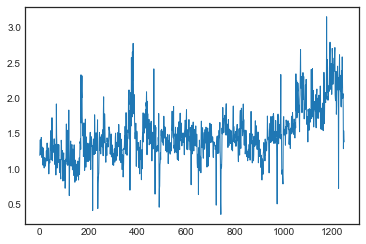

In [8]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
plt.plot('Volume',data=df, lw=1)
plt.show()

In [36]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.compat import lzip
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.diagnostic as sm_diagnostic
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.style.use('seaborn-white')
from sklearn.datasets.samples_generator import make_regression
import math
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from random import random
import scipy.stats as stats
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
from patsy import dmatrices

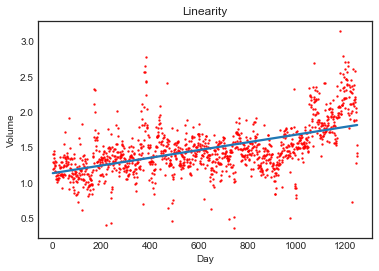

In [28]:
import warnings;
warnings.filterwarnings('ignore');

sns.regplot('Day', 'Volume', data=df, order=1, ci=None, scatter_kws={'color':'r', 's':2}).set(title='Linearity');
plt.xlabel("Day")
plt.ylabel("Volume")
plt.show()

In [37]:
import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [42]:
X_train = df[:'2004'][['Lag1','Lag2']]
y_train = df[:'2004']['Direction']

X_test = df['2005':][['Lag1','Lag2']]
y_test = df['2005':]['Direction']

lda = LinearDiscriminantAnalysis()
pred = lda.fit(X_train, y_train).predict(X_test)

In [43]:
lda.priors_

array([0.49198397, 0.50801603])

In [44]:
lda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [45]:
lda.coef_

array([[-0.05544078, -0.0443452 ]])

In [58]:
confusion_matrix(y_test, pred).T

array([[ 35,  35],
       [ 76, 106]], dtype=int64)

In [47]:
print(classification_report(y_test, pred, digits=3))


              precision    recall  f1-score   support

        Down      0.500     0.315     0.387       111
          Up      0.582     0.752     0.656       141

    accuracy                          0.560       252
   macro avg      0.541     0.534     0.522       252
weighted avg      0.546     0.560     0.538       252



Predictions are accurate 56% of the time!

In [50]:
pred_p = lda.predict_proba(X_test)

np.unique(pred_p[:,1]>0.5, return_counts=True)

(array([False,  True]), array([ 70, 182], dtype=int64))

In [63]:
np.unique(pred_p[:,1]<0.5, return_counts=True)

(array([False,  True]), array([182,  70], dtype=int64))

In [65]:
np.unique(pred_p[:,1]>0.51, return_counts=True)

(array([False,  True]), array([147, 105], dtype=int64))

In [66]:
np.unique(pred_p[:,1]>0.52, return_counts=True)

(array([False,  True]), array([222,  30], dtype=int64))

In [67]:
np.unique(pred_p[:,1]>0.53, return_counts=True)

(array([False,  True]), array([246,   6], dtype=int64))

In [68]:
np.unique(pred_p[:,1]>0.54, return_counts=True)

(array([False,  True]), array([251,   1], dtype=int64))

In [77]:
np.unique(pred_p[:,1]>0.542, return_counts=True)

(array([False,  True]), array([251,   1], dtype=int64))

In [78]:
np.unique(pred_p[:,1]>0.543, return_counts=True)

(array([False]), array([252], dtype=int64))

In [52]:
np.unique(pred_p[:,1]>0.9, return_counts=True)

(array([False]), array([252], dtype=int64))

**Quadratic Discriminant Analysis**:

In [79]:
qda = QuadraticDiscriminantAnalysis()
pred = qda.fit(X_train, y_train).predict(X_test)

In [80]:
qda.priors_

array([0.49198397, 0.50801603])

In [81]:
qda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [83]:
confusion_matrix(y_test, pred).T

array([[ 30,  20],
       [ 81, 121]], dtype=int64)

In [84]:
print(classification_report(y_test, pred, digits=3))

              precision    recall  f1-score   support

        Down      0.600     0.270     0.373       111
          Up      0.599     0.858     0.706       141

    accuracy                          0.599       252
   macro avg      0.600     0.564     0.539       252
weighted avg      0.599     0.599     0.559       252



Predictions are accurate almost 60% of the time!

In [86]:
pred_p_q = qda.predict_proba(X_test)

np.unique(pred_p_q[:,1]>0.5, return_counts=True)

(array([False,  True]), array([ 50, 202], dtype=int64))

In [88]:
pred_p_q = qda.predict_proba(X_test)

np.unique(pred_p_q[:,1]<0.5, return_counts=True)

(array([False,  True]), array([202,  50], dtype=int64))

In [90]:
pred_p_q = qda.predict_proba(X_test)

np.unique(pred_p_q[:,1]>0.54, return_counts=True)

(array([False,  True]), array([250,   2], dtype=int64))

In [91]:
pred_p_q = qda.predict_proba(X_test)

np.unique(pred_p_q[:,1]>0.545, return_counts=True)

(array([False,  True]), array([251,   1], dtype=int64))

In [94]:
pred_p_q = qda.predict_proba(X_test)

np.unique(pred_p_q[:,1]>0.546, return_counts=True)

(array([False,  True]), array([251,   1], dtype=int64))

In [95]:
pred_p_q = qda.predict_proba(X_test)

np.unique(pred_p_q[:,1]>0.547, return_counts=True)

(array([False]), array([252], dtype=int64))

## **References**

Gareth, J., Daniela, W., Trevor, H., & Robert, T. (2013). An introduction to statistical learning: with applications in R. Spinger.